In [1]:
import ray
import sys
from skimage import io
sys.path.append("../src")
import os
os.environ["PYTHONPATH"] = os.environ.get("PYTHONPATH", "") + os.pathsep + "../src"
from actors.segmentation import Segmentor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ray.init()

Waiting for redis server at 127.0.0.1:57722 to respond...
Waiting for redis server at 127.0.0.1:63646 to respond...
Starting local scheduler with the following resources: {'CPU': 12, 'GPU': 1}.

View the web UI at http://localhost:8890/notebooks/ray_ui39277.ipynb?token=6ab474e3d9bf01fd7c1911c91cf6d6c82af4d1eae7e64eec



{'local_scheduler_socket_names': ['/tmp/scheduler70570100'],
 'node_ip_address': '127.0.0.1',
 'object_store_addresses': [ObjectStoreAddress(name='/tmp/plasma_store25463357', manager_name='/tmp/plasma_manager97099304', manager_port=11360)],
 'redis_address': '127.0.0.1:57722',
 'webui_url': 'http://localhost:8890/notebooks/ray_ui39277.ipynb?token=6ab474e3d9bf01fd7c1911c91cf6d6c82af4d1eae7e64eec'}

In [3]:
seg = Segmentor.remote("drn_d_22", 19,
                       "../data/segmentation/drn_d_22_bdd_v1.pth")

In [4]:
img = io.imread("http://openmindjournals.com/wp-content/uploads/2014/11/OMJ-New-york-street-style-manhattan-.jpg")

In [5]:
out = ray.get(seg.segment_image.remote(img))

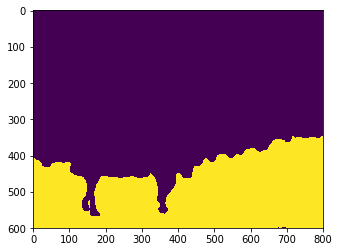

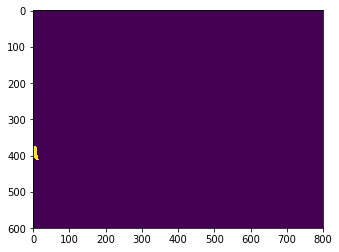

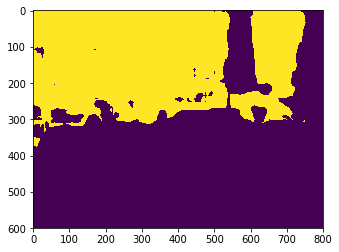

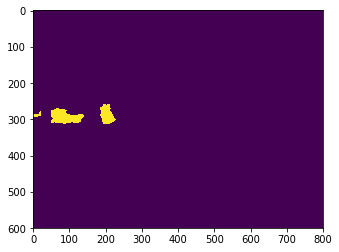

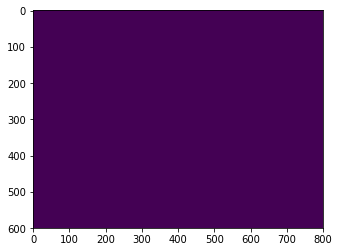

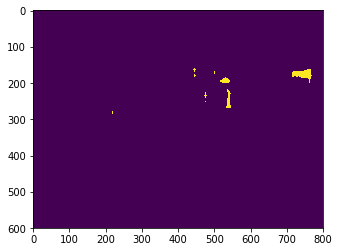

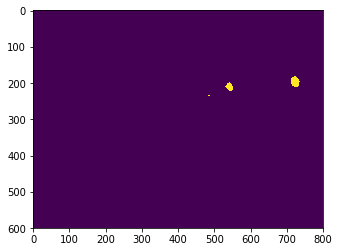

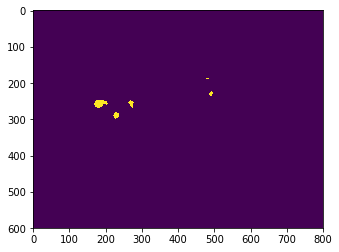

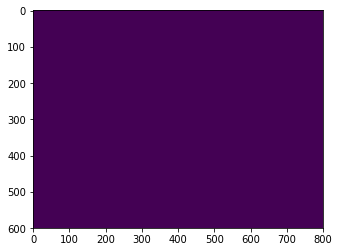

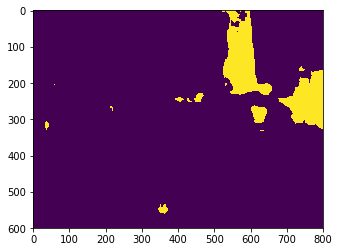

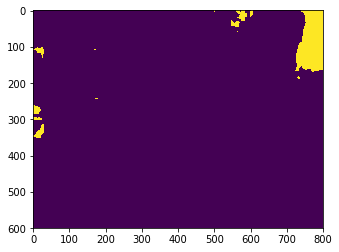

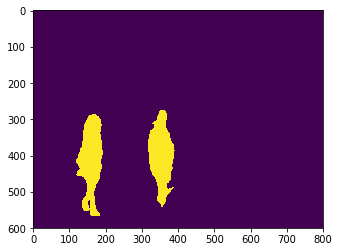

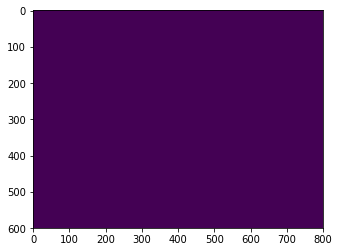

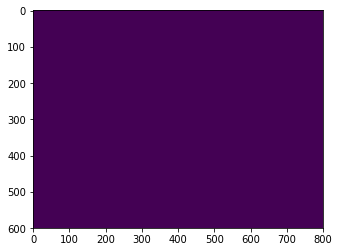

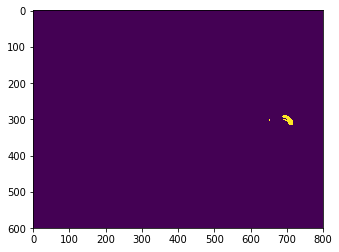

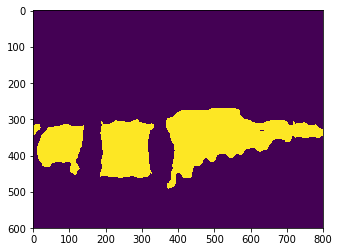

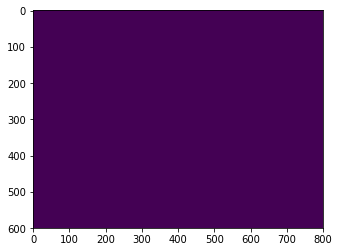

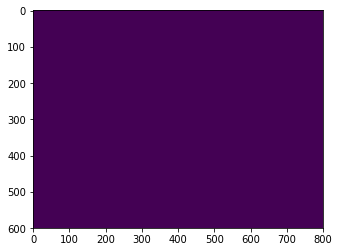

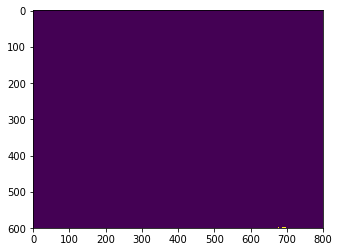

In [6]:
for i in range(out.shape[2]):
    plt.imshow(out[:,:,i])
    plt.show()